# Download Euronext stock historical prices

This notebook describes a method to download the historical price series for companies listed on Euronext stock exchange. It works in two steps :

1. Download a list of listed companies on [Euronext's website](https://live.euronext.com/en/products/equities/list).
- For every ticker in the list, download the historical prices using yfinance.


In [1]:
## LOAD EURONEXT DATA

import pandas as pd

tickers = pd.read_csv('data/Euronext_Equities_2019-12-16.csv', sep = ";")
tickers_paris = tickers.loc[tickers['Market'].isin(['Euronext Access Paris', 'Euronext Growth Paris', 'Euronext Paris'])]

print('Number of tickers (total) : {}'.format(tickers.shape[0]))
print('Number of tickers (selected) : {}'.format(tickers_paris.shape[0]))

Number of tickers (total) : 1395
Number of tickers (selected) : 879


In [2]:
## DOWNLOAD SERIES WITH YFINANCE

import yfinance as yf

def get_stock_open(tickers, period = '1y'):
    op = []
    for t in tickers:
        op.append(yf.Ticker(t).history(period = period).Open)
    return pd.DataFrame(op, index = tickers).T

n = 100  # chunk size
indices = [(i,i+n) for i in range(0,tickers_paris.shape[0],n)]

for (i,j) in indices:
    filename = 'data/euronext-stock-data-{}.csv'.format(str(j))
    ticks = ['{}.PA'.format(t) for t in tickers_paris['Symbol'][i:j]]
    data = get_stock_open(ticks)
    data.to_csv(filename, sep = ';')
    print('Data written to {}'.format(filename))

- MLATV.PA: No data found, symbol may be delisted
- MLAGA.PA: No data found, symbol may be delisted
- ANVBS.PA: No data found, symbol may be delisted
- MLBAR.PA: No data found for this date range, symbol may be delisted
Data written to data/euronext-stock-data-100.csv
- MLCTA.PA: No data found, symbol may be delisted
Data written to data/euronext-stock-data-200.csv
- ALDBS.PA: No data found for this date range, symbol may be delisted
Data written to data/euronext-stock-data-300.csv
- FLEBS.PA: No data found, symbol may be delisted
Data written to data/euronext-stock-data-400.csv
- MLIDP.PA: No data found, symbol may be delisted
- MLIPO.PA: No data found, symbol may be delisted
- ALIVA.PA: No data found, symbol may be delisted
- MLLOG.PA: No data found for this date range, symbol may be delisted
Data written to data/euronext-stock-data-500.csv
- MBWSZ.PA: No data found, symbol may be delisted
- MLMCE.PA: No data found, symbol may be delisted
- MLSKN.PA: No data found, symbol may be deli

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 2019-03-18 to 2020-03-18
Columns: 879 entries, BEN.PA to MLABO.PA
dtypes: float64(879)
memory usage: 1.8+ MB
None


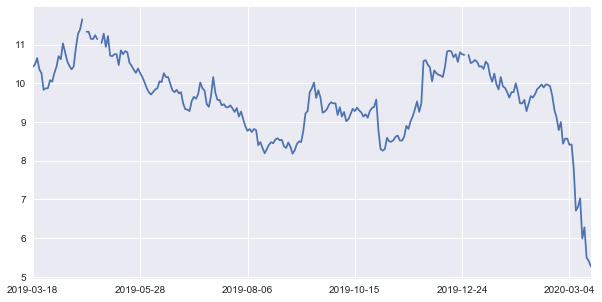

In [7]:
## CHECK THE DATA AND PLOT AN EXAMPLE

import glob

dfs = [pd.read_csv(f, sep = ";", index_col = 'Date') for f in glob.glob("data/euronext-stock-data-*.csv")]
df_open = pd.concat(dfs, axis = 1, sort = True)
print(df_open.info())

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 5)})

df_open['BEN.PA'].plot()